In [61]:
import netCDF4 as nc
import datetime as dt
import subprocess
import matplotlib.pyplot as plt
import cmocean
from salishsea_tools import viz_tools
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

%matplotlib inline

In [18]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [13]:
t0=dt.datetime(2014,9,12)
fformat1='%d%b%y/'
fformat2='SalishSea_1d_%Y%m%d_%Y%m%d_ptrc_T.nc'
flist=list()
for idt0 in [t0+dt.timedelta(days=ii*1) for ii in range(0,1230)]:
    fformat1='%d%b%y/'
    fformat2='SalishSea_1d_%Y%m%d_%Y%m%d_ptrc_T.nc'
    iff=idt0.strftime(fformat1).lower()+idt0.strftime(fformat2)
    flist.append(iff)
%time subprocess.call('ncrcat -v silicon -d y,673,673 -d x,156,156 '+' '.join(flist)+' /data/vdo/MEOPAR/silicon.nc',shell=True,cwd="/results/SalishSea/nowcast-green")

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 13min 27s


0

In [16]:
t0=dt.datetime(2014,9,12)
fformat1='%d%b%y/'
fformat2='SalishSea_1d_%Y%m%d_%Y%m%d_ptrc_T.nc'
flist=list()
for idt0 in [t0+dt.timedelta(days=ii*1) for ii in range(0,1230)]:
    fformat1='%d%b%y/'
    fformat2='SalishSea_1d_%Y%m%d_%Y%m%d_ptrc_T.nc'
    iff=idt0.strftime(fformat1).lower()+idt0.strftime(fformat2)
    flist.append(iff)
%time subprocess.call('ncrcat -v biodenic_silicon -d y,673,673 -d x,156,156 '+' '.join(flist)+' /data/vdo/MEOPAR/biogemic_silicon.nc',shell=True,cwd="/results/SalishSea/nowcast-green")
%time subprocess.call('ncrcat -v ammonium -d y,673,673 -d x,156,156 '+' '.join(flist)+' /data/vdo/MEOPAR/ammonium.nc',shell=True,cwd="/results/SalishSea/nowcast-green")
%time subprocess.call('ncrcat -v nitrate -d y,673,673 -d x,156,156 '+' '.join(flist)+' /data/vdo/MEOPAR/nitrate.nc',shell=True,cwd="/results/SalishSea/nowcast-green")
%time subprocess.call('ncrcat -v particulate_organic_nitrogen -d y,673,673 -d x,156,156 '+' '.join(flist)+' /data/vdo/MEOPAR/pon.nc',shell=True,cwd="/results/SalishSea/nowcast-green")
%time subprocess.call('ncrcat -v dissolved_organic_nitrogen -d y,673,673 -d x,156,156 '+' '.join(flist)+' /data/vdo/MEOPAR/don.nc',shell=True,cwd="/results/SalishSea/nowcast-green")

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 23.2 ms
CPU times: user 32 ms, sys: 4 ms, total: 36 ms
Wall time: 14min 24s
CPU times: user 24 ms, sys: 8 ms, total: 32 ms
Wall time: 14min
CPU times: user 24 ms, sys: 8 ms, total: 32 ms
Wall time: 14min 42s
CPU times: user 20 ms, sys: 20 ms, total: 40 ms
Wall time: 14min 42s


0

In [60]:
bathy = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')

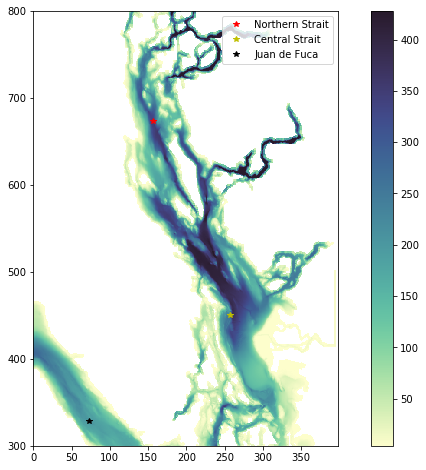

In [67]:
fig, ax = plt.subplots(figsize = (12,8))
b = ax.pcolormesh(bathy.variables['Bathymetry'][:], cmap = cmocean.cm.deep)
fig.colorbar(b, ax=ax)
viz_tools.set_aspect(ax)
ax.plot(156, 673, 'r*', label = 'Northern Strait')
ax.plot(257, 450, 'y*', label = 'Central Strait')
ax.plot(73, 329, '*', color = 'black', label = 'Juan de Fuca')
ax.legend()
ax.set_ylim(300, 800);

In [19]:
f = nc.Dataset('/data/vdo/MEOPAR/silicon.nc')

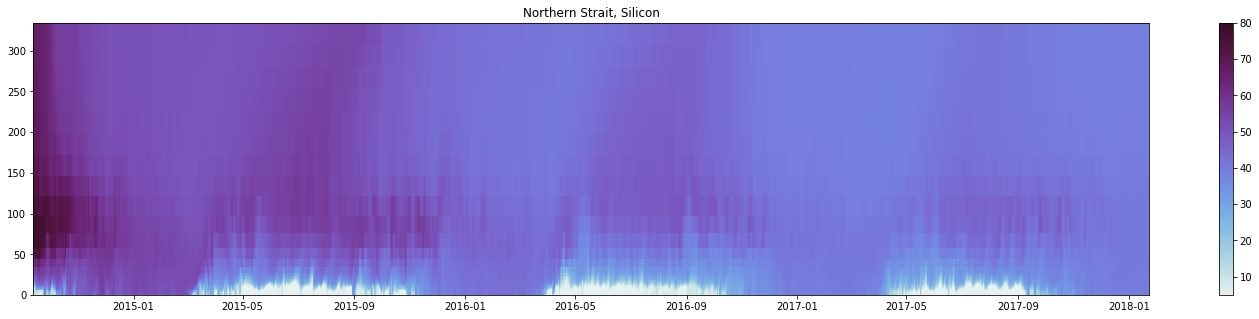

In [43]:
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(f.variables['time_counter'][:], f.variables['time_counter'].units),
              f.variables['deptht'][:36], f.variables['silicon'][:,:36,0,0].T,
                 vmin = 5, vmax = 80, cmap = cmocean.cm.dense)
fig.colorbar(s, ax=ax)
ax.set_title('Northern Strait, Silicon');

In [68]:
f = nc.Dataset('/data/vdo/MEOPAR/central_silicon.nc')

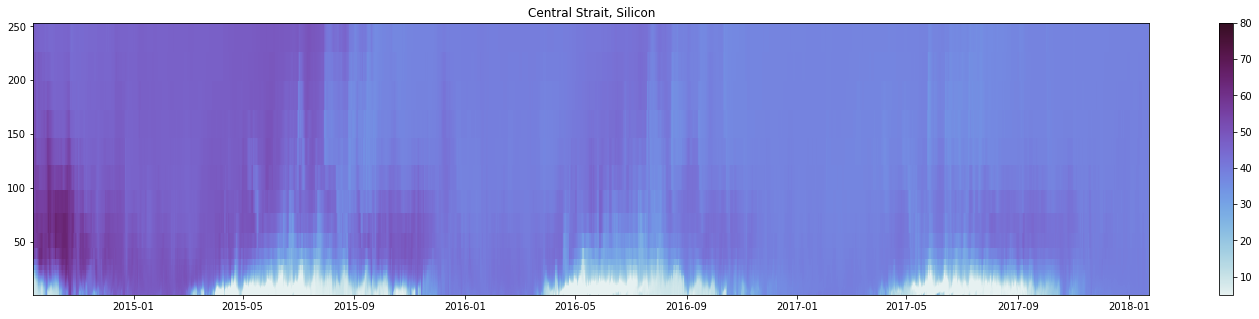

In [72]:
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(f.variables['time_counter'][:], f.variables['time_counter'].units),
              f.variables['deptht'][:33], f.variables['silicon'][:,:33,0,0].T,
                 vmin = 5, vmax = 80, cmap = cmocean.cm.dense)
fig.colorbar(s, ax=ax)
ax.set_title('Central Strait, Silicon');

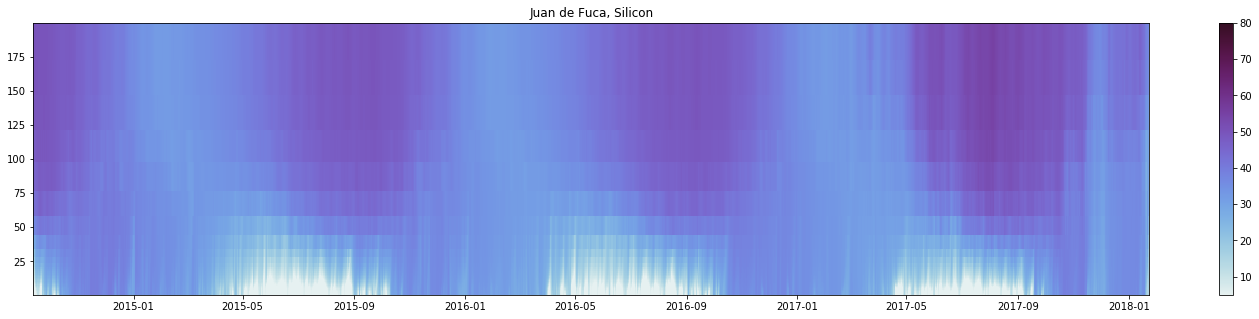

In [87]:
f = nc.Dataset('/data/vdo/MEOPAR/jdf_silicon.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(f.variables['time_counter'][:], f.variables['time_counter'].units),
              f.variables['deptht'][:31], f.variables['silicon'][:,:31,0,0].T,
                 vmin = 5, vmax = 80, cmap = cmocean.cm.dense)
fig.colorbar(s, ax=ax)
ax.set_title('Juan de Fuca, Silicon');

In [31]:
mesh = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/mesh_mask201702.nc')

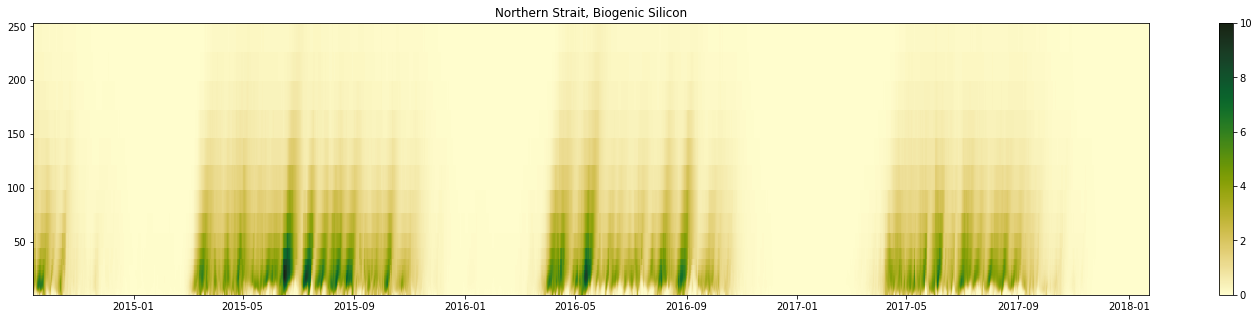

In [92]:
h = nc.Dataset('/data/vdo/MEOPAR/biogenic_silicon2.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:33], h.variables['biogenic_silicon'][:,:33,0,0].T,
                 vmin = 0, vmax = 10, cmap = cmocean.cm.speed)
fig.colorbar(s, ax=ax)
ax.set_title('Northern Strait, Biogenic Silicon');

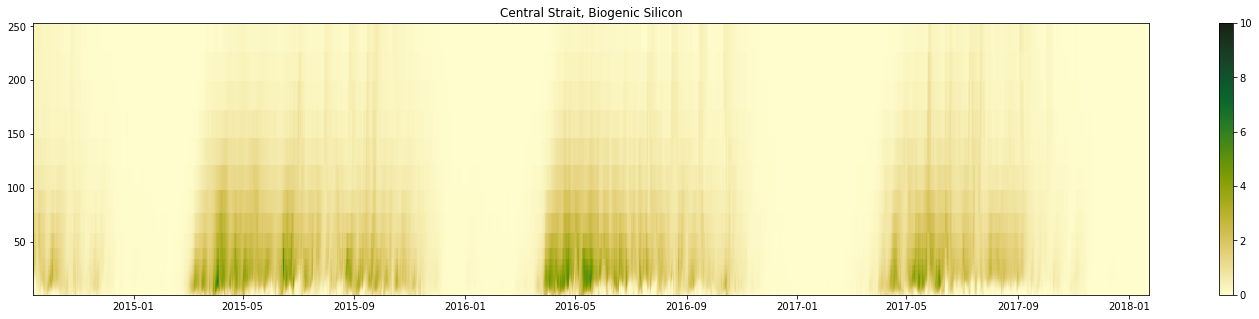

In [93]:
h = nc.Dataset('/data/vdo/MEOPAR/central_biogenic_silicon2.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:33], h.variables['biogenic_silicon'][:,:33,0,0].T,
                 vmin = 0, vmax = 10, cmap = cmocean.cm.speed)
fig.colorbar(s, ax=ax)
ax.set_title('Central Strait, Biogenic Silicon');

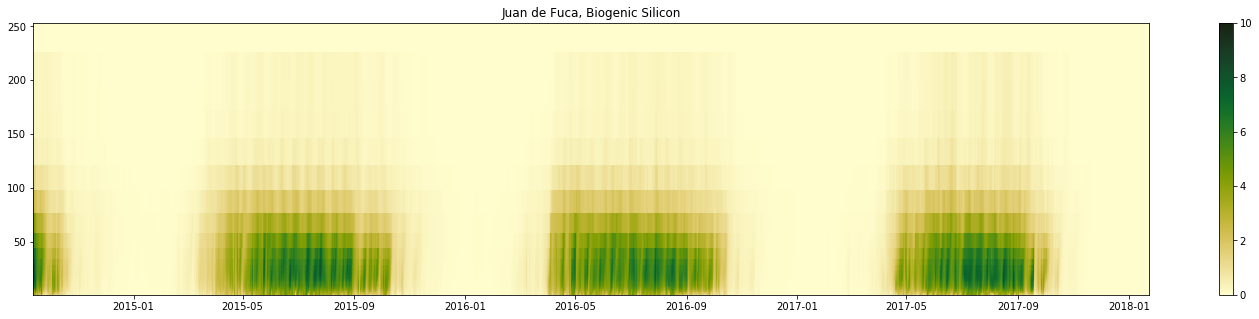

In [96]:
h = nc.Dataset('/data/vdo/MEOPAR/jdf_biogenic_silicon.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:33], h.variables['biogenic_silicon'][:,:33,0,0].T,
                 vmin = 0, vmax = 10, cmap = cmocean.cm.speed)
fig.colorbar(s, ax=ax)
ax.set_title('Juan de Fuca, Biogenic Silicon');

In [42]:
g = nc.Dataset('/data/vdo/MEOPAR/ammonium.nc')

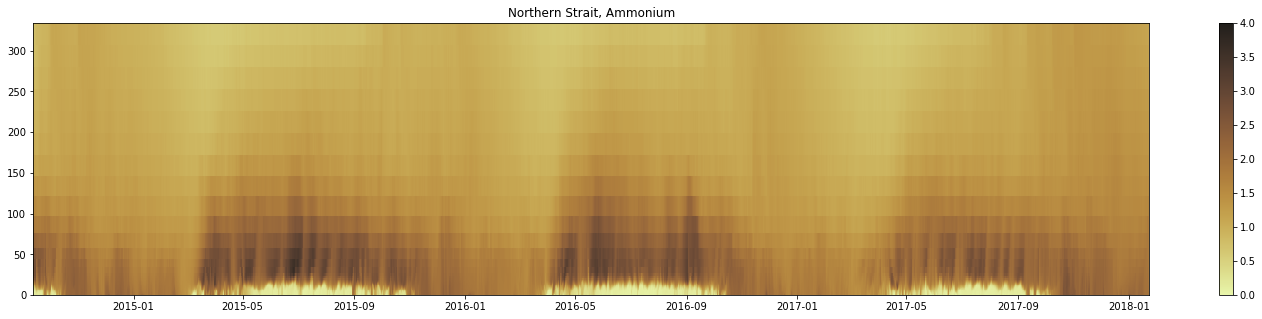

In [46]:
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(g.variables['time_counter'][:], g.variables['time_counter'].units),
              g.variables['deptht'][:36], g.variables['ammonium'][:,:36,0,0].T,
                 vmin = 0, vmax = 4, cmap = cmocean.cm.turbid)
fig.colorbar(s, ax=ax)
ax.set_title('Northern Strait, Ammonium');

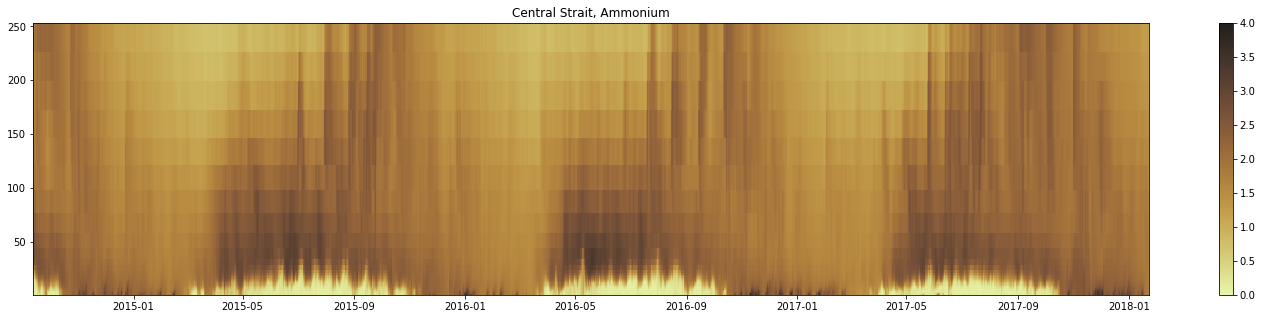

In [73]:
g = nc.Dataset('/data/vdo/MEOPAR/dentral_ammonium.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(g.variables['time_counter'][:], g.variables['time_counter'].units),
              g.variables['deptht'][:33], g.variables['ammonium'][:,:33,0,0].T,
                 vmin = 0, vmax = 4, cmap = cmocean.cm.turbid)
fig.colorbar(s, ax=ax)
ax.set_title('Central Strait, Ammonium');

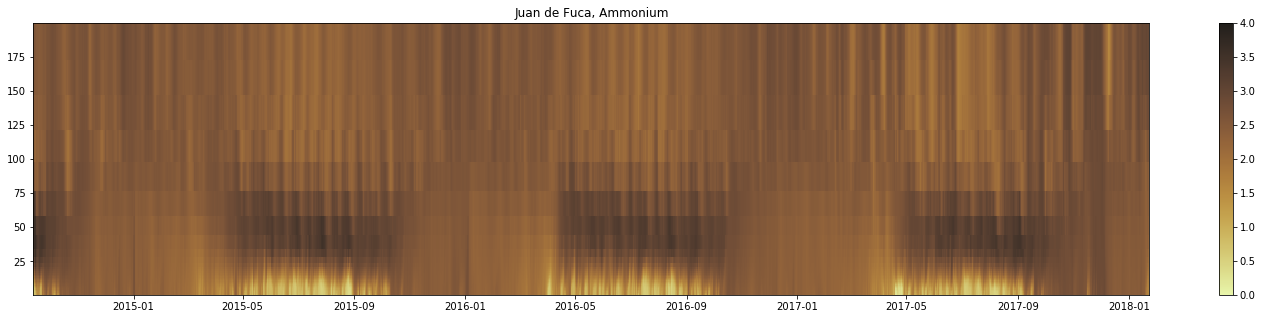

In [85]:
g = nc.Dataset('/data/vdo/MEOPAR/jdf_ammonium.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(g.variables['time_counter'][:], g.variables['time_counter'].units),
              g.variables['deptht'][:31], g.variables['ammonium'][:,:31,0,0].T,
                 vmin = 0, vmax = 4, cmap = cmocean.cm.turbid)
fig.colorbar(s, ax=ax)
ax.set_title('Juan de Fuca, Ammonium');

In [47]:
h = nc.Dataset('/data/vdo/MEOPAR/nitrate.nc')

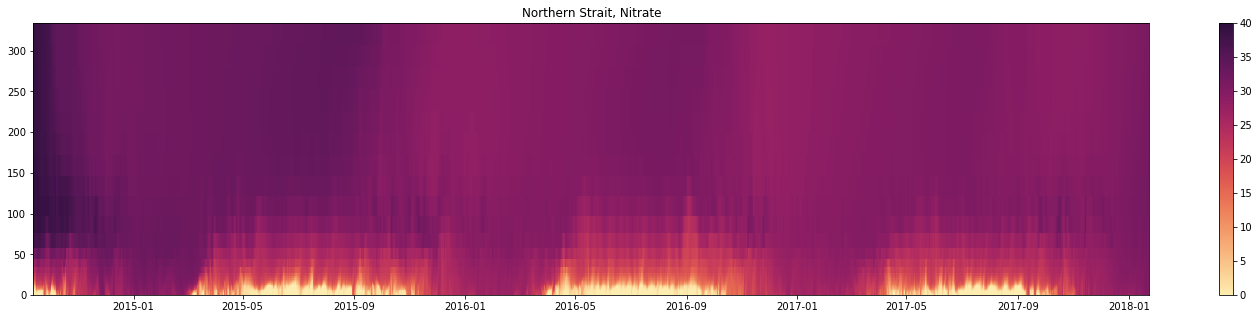

In [50]:
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:36], h.variables['nitrate'][:,:36,0,0].T,
                 vmin = 0, vmax = 40, cmap = cmocean.cm.matter)
fig.colorbar(s, ax=ax)
ax.set_title('Northern Strait, Nitrate');

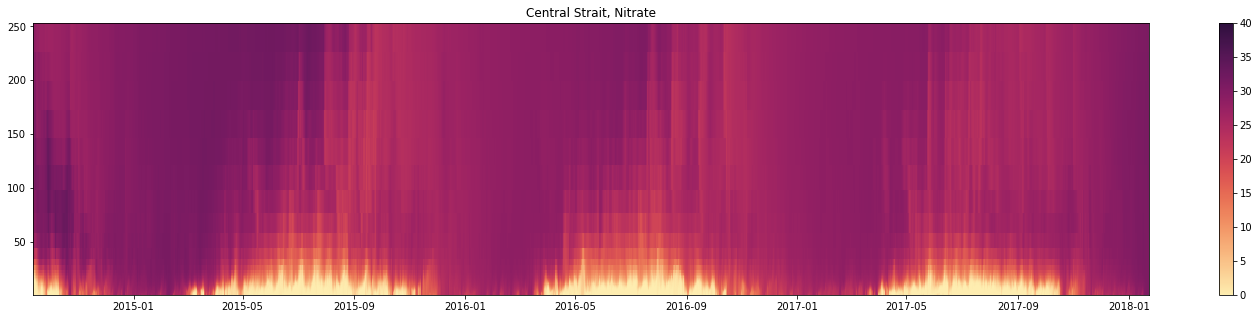

In [74]:
h = nc.Dataset('/data/vdo/MEOPAR/central_nitrate.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:33], h.variables['nitrate'][:,:33,0,0].T,
                 vmin = 0, vmax = 40, cmap = cmocean.cm.matter)
fig.colorbar(s, ax=ax)
ax.set_title('Central Strait, Nitrate');

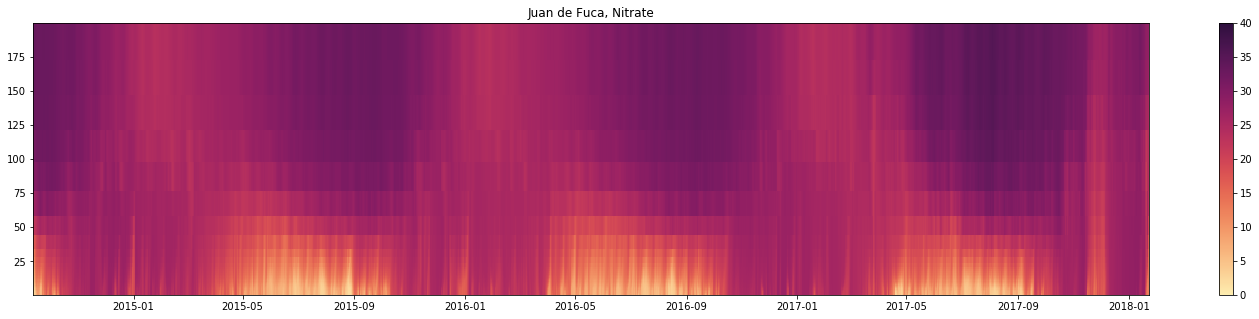

In [84]:
h = nc.Dataset('/data/vdo/MEOPAR/jdf_nitrate.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:31], h.variables['nitrate'][:,:31,0,0].T,
                 vmin = 0, vmax = 40, cmap = cmocean.cm.matter)
fig.colorbar(s, ax=ax)
ax.set_title('Juan de Fuca, Nitrate');

In [51]:
h = nc.Dataset('/data/vdo/MEOPAR/pon.nc')

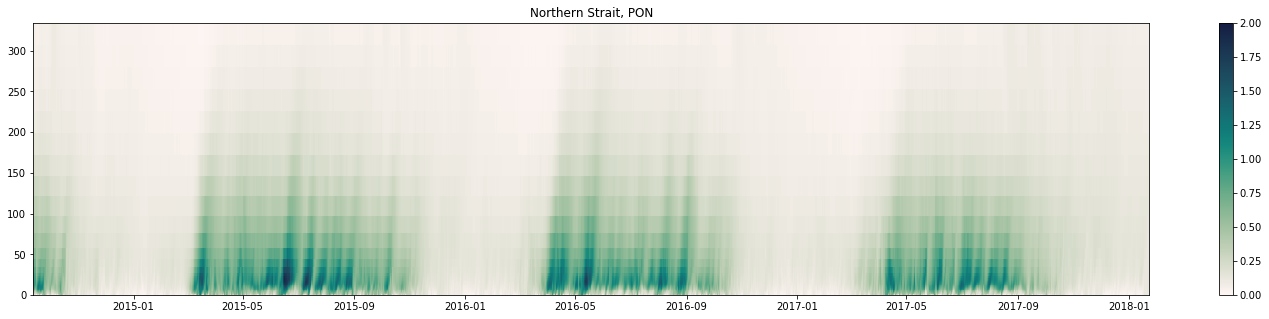

In [54]:
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:36], h.variables['particulate_organic_nitrogen'][:,:36,0,0].T,
                 vmin = 0, vmax = 2, cmap = cmocean.cm.tempo)
fig.colorbar(s, ax=ax)
ax.set_title('Northern Strait, PON');

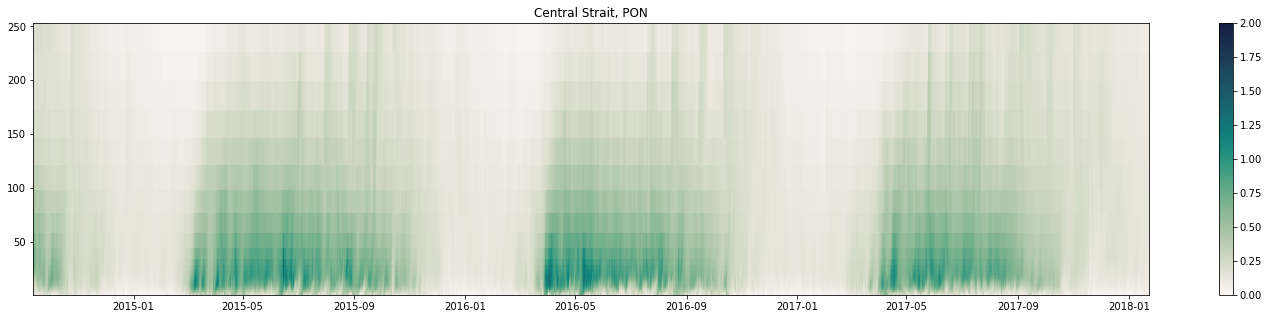

In [75]:
h = nc.Dataset('/data/vdo/MEOPAR/central_pon.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:33], h.variables['particulate_organic_nitrogen'][:,:33,0,0].T,
                 vmin = 0, vmax = 2, cmap = cmocean.cm.tempo)
fig.colorbar(s, ax=ax)
ax.set_title('Central Strait, PON');

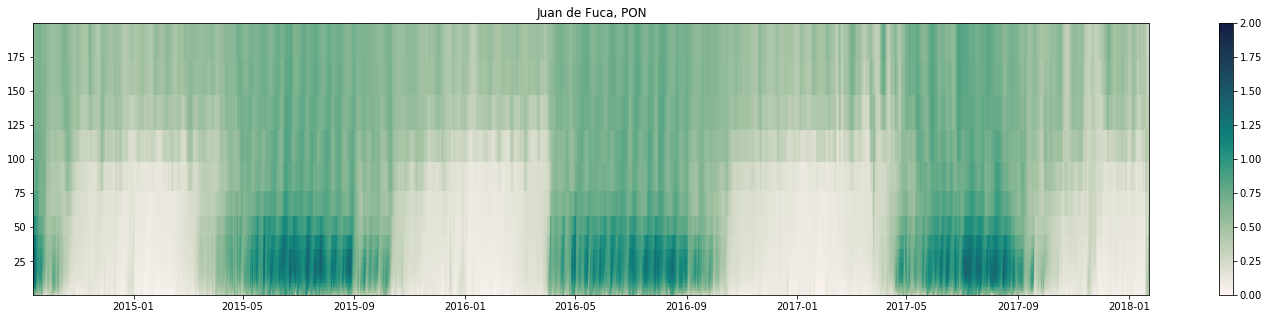

In [83]:
h = nc.Dataset('/data/vdo/MEOPAR/jdf_pon.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:31], h.variables['particulate_organic_nitrogen'][:,:31,0,0].T,
                 vmin = 0, vmax = 2, cmap = cmocean.cm.tempo)
fig.colorbar(s, ax=ax)
ax.set_title('Juan de Fuca, PON');

In [55]:
h = nc.Dataset('/data/vdo/MEOPAR/don.nc')

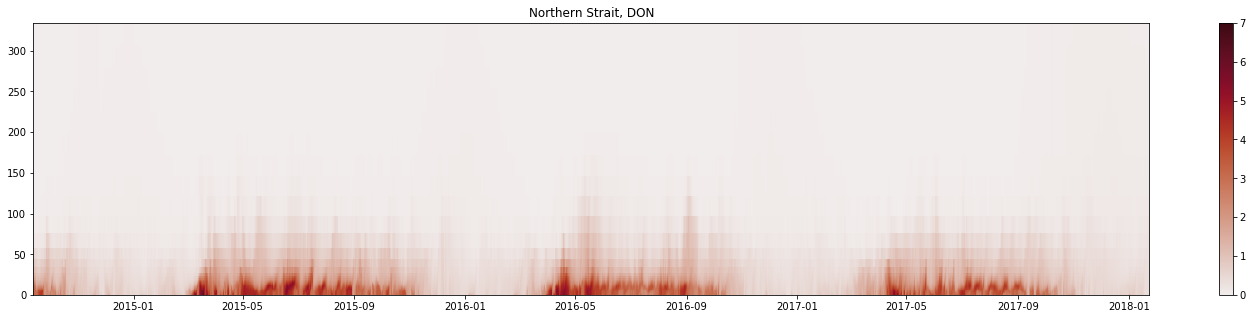

In [58]:
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:36], h.variables['dissolved_organic_nitrogen'][:,:36,0,0].T,
                 vmin = 0, vmax = 7, cmap = cmocean.cm.amp)
fig.colorbar(s, ax=ax)
ax.set_title('Northern Strait, DON');

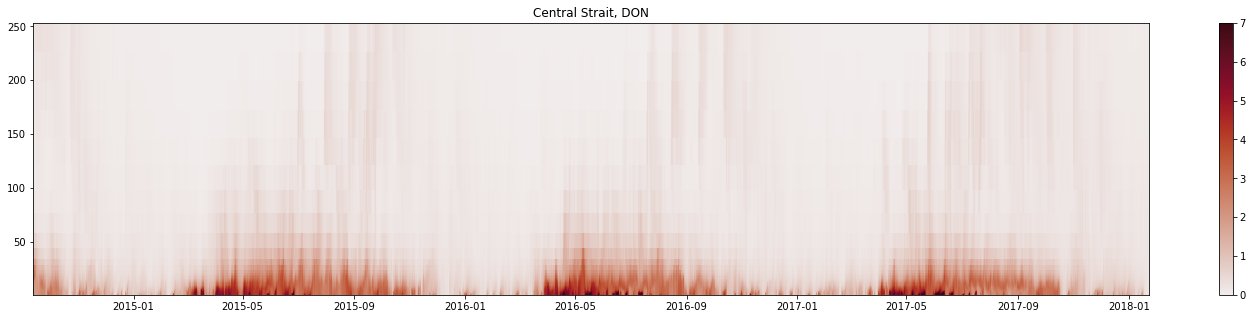

In [76]:
h = nc.Dataset('/data/vdo/MEOPAR/central_don.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:33], h.variables['dissolved_organic_nitrogen'][:,:33,0,0].T,
                 vmin = 0, vmax = 7, cmap = cmocean.cm.amp)
fig.colorbar(s, ax=ax)
ax.set_title('Central Strait, DON');

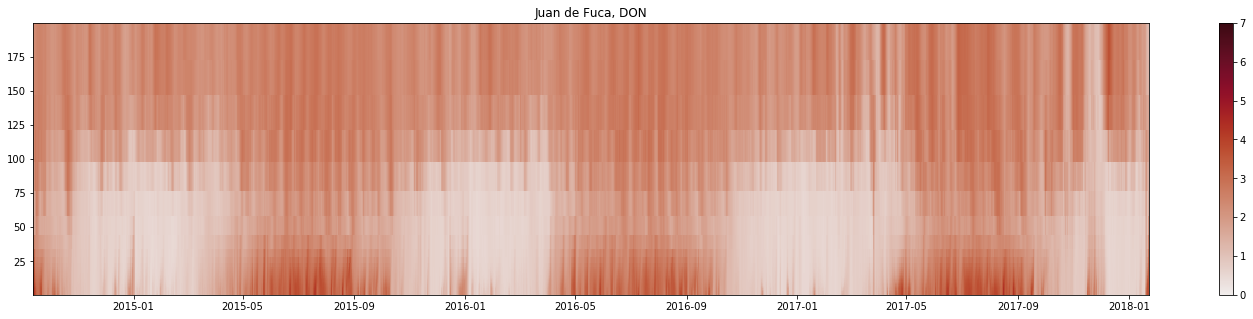

In [82]:
h = nc.Dataset('/data/vdo/MEOPAR/jdf_don.nc')
fig, ax = plt.subplots(figsize = (25,5))
s = ax.pcolormesh(nc.num2date(h.variables['time_counter'][:], h.variables['time_counter'].units),
              h.variables['deptht'][:31], h.variables['dissolved_organic_nitrogen'][:,:31,0,0].T,
                 vmin = 0, vmax = 7, cmap = cmocean.cm.amp)
fig.colorbar(s, ax=ax)
ax.set_title('Juan de Fuca, DON');